In [13]:
import pandas as pd

# Load the CSV file
file_path = 'Res-SFH-4a - Site CO2 Hungary.csv'
df = pd.read_csv(file_path)

# Melt the DataFrame to convert the specified columns into one column
melted_df = df.melt(id_vars=['Fuel Type'], value_vars=['Present Case', 'Renovation: Envelope', 'Renovation: Envelope + ASHP'], 
                    var_name='Scenario', value_name='Value')

# Display the first few rows of the processed DataFrame
melted_df.head()


,Fuel Type,Scenario,Value
0,Electricity,Present Case,1704
1,Natural Gas,Present Case,16001
2,Electricity,Renovation: Envelope,1695
3,Natural Gas,Renovation: Envelope,7464
4,Electricity,Renovation: Envelope + ASHP,4950


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("notebook", font_scale=1.5)
sns.set_theme(style="ticks")


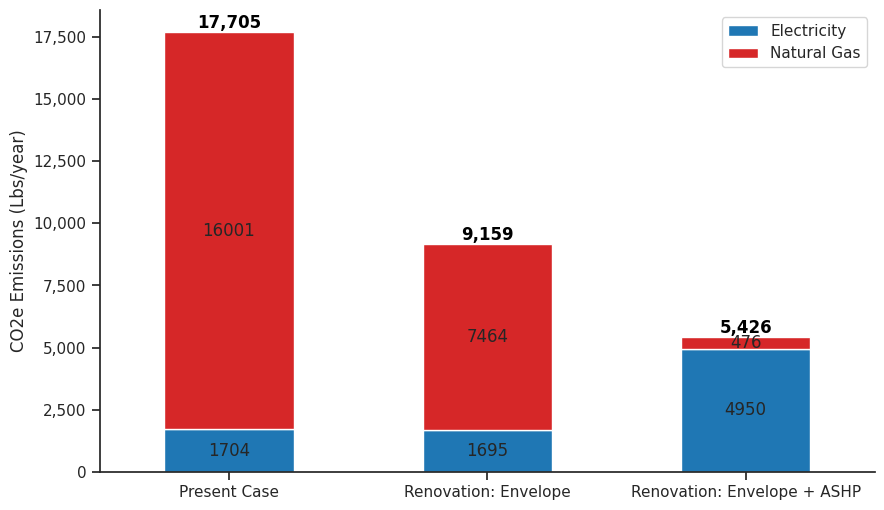

In [54]:
# Create a stacked plot
fig, ax = plt.subplots(figsize=(10, 6))


# Create a pivot table to prepare for stacked plot
pivot_df = melted_df.pivot_table(index='Scenario', columns='Fuel Type', values='Value', aggfunc='sum')

# Create a stacked plot
pivot_df.plot.bar(stacked=True, figsize=(10, 6), ax=ax, color=['tab:blue', 'tab:red'], rot=0)

# 
sns.despine(top=True, right=True)

# ax.set_title('Stacked Plot of Fuel Type Values for Each Scenario')
ax.set_xlabel('')
ax.set_ylabel('CO2e Emissions (Lbs/year)')
ax.legend(loc='upper right')

# Add thousands separator to y-axis
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Show values on the middle of the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, y + height/2, int(height), ha='center', va='center')

# Show the total CO2e emissions for each scenario
for i, scenario in enumerate(pivot_df.index):
    total = pivot_df.loc[scenario].sum()
    ax.text(i, total, f'{total:,}', ha='center', va='bottom', color='black', fontweight='bold')

# Add line to link stacked bar plot of electricity and gas



# Save the plot
for graph in ['png', 'svg']:
    fig.savefig('stacked_co2_plot.' + graph, dpi=600, bbox_inches='tight')



In [56]:
# Load the CSV file
file_path = 'Res-SFH-4a - End Use.csv'
df = pd.read_csv(file_path)

# Melt the DataFrame to convert the specified columns into one column
melted_df = df.melt(id_vars=['End Use'], value_vars=['Present Case', 'Renovation: Envelope', 'Renovation: Envelope + ASHP'], 
                    var_name='Scenario', value_name='Value')

# Display the first few rows of the processed DataFrame
melted_df.head()

,End Use,Scenario,Value
0,Misc.,Present Case,4.92
1,Lg. Appl.,Present Case,7.54
2,Lights,Present Case,3.26
3,Cooling Fan/Pump,Present Case,0.00
4,Cooling,Present Case,0.00


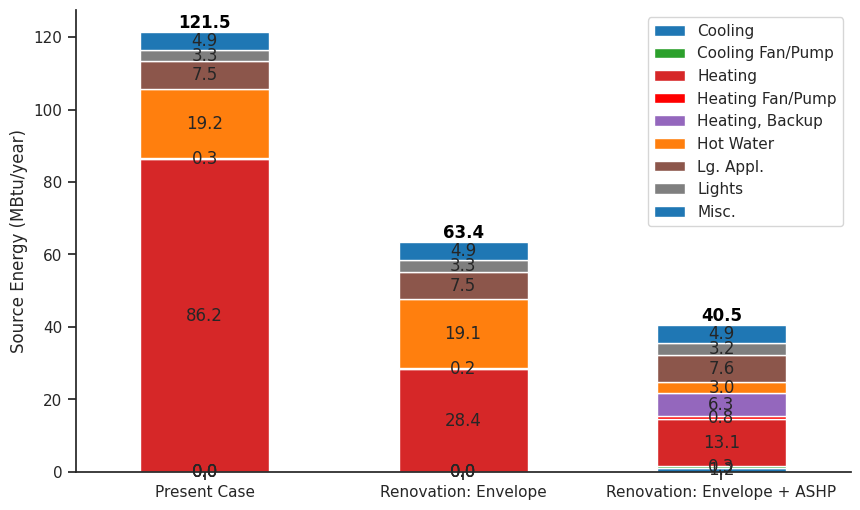

In [62]:
# Create a stacked plot
fig, ax = plt.subplots(figsize=(10, 6))


# Create a pivot table to prepare for stacked plot
pivot_df = melted_df.pivot_table(index='Scenario', columns='End Use', values='Value', aggfunc='sum')

# Create a stacked plot
pivot_df.plot.bar(stacked=True, figsize=(10, 6), ax=ax, rot=0, 
                  color=['tab:blue', 'tab:green', 'tab:red', 'red', 'tab:purple', 'tab:orange', 'tab:gray', 'tab:brown'])

# 
sns.despine(top=True, right=True)

# ax.set_title('Stacked Plot of Fuel Type Values for Each Scenario')
ax.set_xlabel('')
ax.set_ylabel('Source Energy (MBtu/year)')
ax.legend(loc='upper right')

# Add thousands separator to y-axis
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Show values on the middle of the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, y + height/2, round(height, 1), ha='center', va='center')

# Show the total CO2e emissions for each scenario
for i, scenario in enumerate(pivot_df.index):
    total = pivot_df.loc[scenario].sum()
    ax.text(i, total, f'{total:.1f}', ha='center', va='bottom', color='black', fontweight='bold')

# Add line to link stacked bar plot of electricity and gas



# Save the plot
for graph in ['png', 'svg']:
    fig.savefig('stacked_end_use_plot.' + graph, dpi=600, bbox_inches='tight')

